Exploring node: A, Current Path: A, Cost: 0
  Pushing to PQ: Neighbor: B, New Cost: 1, Path: A
  Pushing to PQ: Neighbor: C, New Cost: 4, Path: A
Exploring node: B, Current Path: A -> B, Cost: 1
  Pushing to PQ: Neighbor: C, New Cost: 3, Path: A -> B
  Pushing to PQ: Neighbor: D, New Cost: 6, Path: A -> B
Exploring node: C, Current Path: A -> B -> C, Cost: 3
  Pushing to PQ: Neighbor: D, New Cost: 4, Path: A -> B -> C
Exploring node: C, Current Path: A -> C, Cost: 4
Exploring node: D, Current Path: A -> B -> C -> D, Cost: 4
Goal node D reached!

Path from A to D: A -> B -> C -> D
Total cost: 4


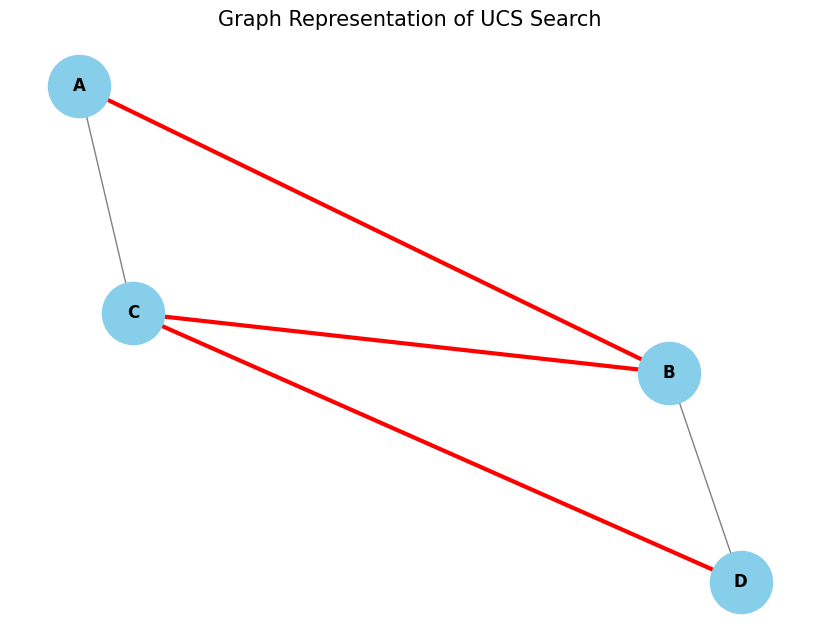

In [ ]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph as a dictionary of cities and their neighbors with edge costs
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# UCS algorithm to find the shortest path and cost from the start node to the goal node
def uniform_cost_search(start, goal):
    # Priority Queue to store nodes to be explored (cost, city, path_taken)
    pq = [(0, start, [])]  # Starting with cost 0, start node, and an empty path
    visited = set()  # Set to track visited cities
    explored = []  # List to track the nodes visited during the search

    while pq:
        # Pop the node with the lowest cost
        cost, node, path = heapq.heappop(pq)

        # Print the current state of the search
        print(f"Exploring node: {node}, Current Path: {' -> '.join(path + [node])}, Cost: {cost}")

        # If the goal node is found, return the path and cost
        if node == goal:
            print(f"Goal node {goal} reached!")
            return path + [node], cost

        # Skip the node if it has already been visited
        if node in visited:
            continue

        # Mark the node as visited
        visited.add(node)

        # Add the neighboring nodes to the priority queue
        for neighbor, edge_cost in graph[node].items():
            if neighbor not in visited:
                new_cost = cost + edge_cost
                heapq.heappush(pq, (new_cost, neighbor, path + [node]))
                print(f"  Pushing to PQ: Neighbor: {neighbor}, New Cost: {new_cost}, Path: {' -> '.join(path + [node])}")

        # Track the visited node in the explored list
        explored.append(node)

    return None, float('inf')  # If the goal is not reachable

# Visualizing the graph and the path using NetworkX and Matplotlib
def plot_graph(path=None):
    # Create a graph object
    G = nx.Graph()

    # Add edges from the graph dictionary
    for node, neighbors in graph.items():
        for neighbor, cost in neighbors.items():
            G.add_edge(node, neighbor, weight=cost)

    # Create a layout for the nodes
    pos = nx.spring_layout(G)  # Spring layout for node placement

    # Draw the nodes, edges, and labels
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, font_weight='bold', edge_color='gray')

    # If a path is provided, highlight it in red
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    # Display the plot
    plt.title("Graph Representation of UCS Search", fontsize=15)
    plt.show()

# Test the UCS algorithm
start_node = 'A'
goal_node = 'D'
path, total_cost = uniform_cost_search(start_node, goal_node)

# Display the result with detailed information
if path:
    print(f"\nPath from {start_node} to {goal_node}: {' -> '.join(path)}")
    print(f"Total cost: {total_cost}")
else:
    print(f"No path found from {start_node} to {goal_node}")

# Plot the graph with the path found
plot_graph(path)
